In [ ]:
import numpy as np
import matplotlib.pyplot as plt


In [98]:
NUM_ACTIONS = 5
NUM_SAMPLES = 100000

<h1> Why E[max_a Q(a)] - max_a E[Q(a)] > 0 </h1>

It would be better to think of Q(a) as independent random variables rather than functions. 

In [110]:
def sample() -> np.ndarray:
    return np.random.randn(NUM_ACTIONS)*[10,10,10,10,10] + [5,4,3,2,1]

In [111]:
Q = sample()
for i in range(NUM_SAMPLES):
    Q = Q + sample()
Q_sum = Q/NUM_SAMPLES
Q_sum

array([5.03663114, 3.98297794, 3.05248932, 1.98633159, 0.97151691])

As can be seen from above, E[Q] = [5,4,3,2,1]. This implies max_a E[Q(a)] = 5 or argmax_a E[Q(a)] = 0th action.

In [112]:
print("max_a E[Q(a)] is",np.max(Q_sum))
print("argmax_a E[Q(a)] is",np.argmax(Q_sum))

max_a E[Q(a)] is 5.036631141346822
argmax_a E[Q(a)] is 0


<h1> Lets compute E[max_a Qhat(a)] </h1>

14.80694447333089


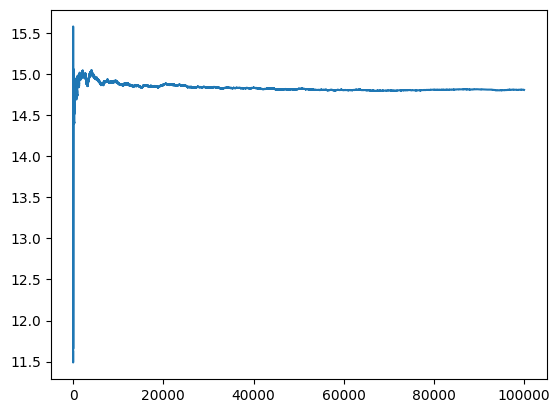

In [113]:
E_maxQ = 0.
track = []
for i in range(NUM_SAMPLES):
    E_maxQ = E_maxQ + (np.max(sample()) - E_maxQ)/(i+1)
    track.append(E_maxQ)
print(E_maxQ)
plt.plot(track);

This is E[max_a Q(a)] and as can be seen, its overestimated with significant positive bias

<h1> Let's now try E[ Q2(argmax_a Q1(a)) ] 

3.2978825115512174


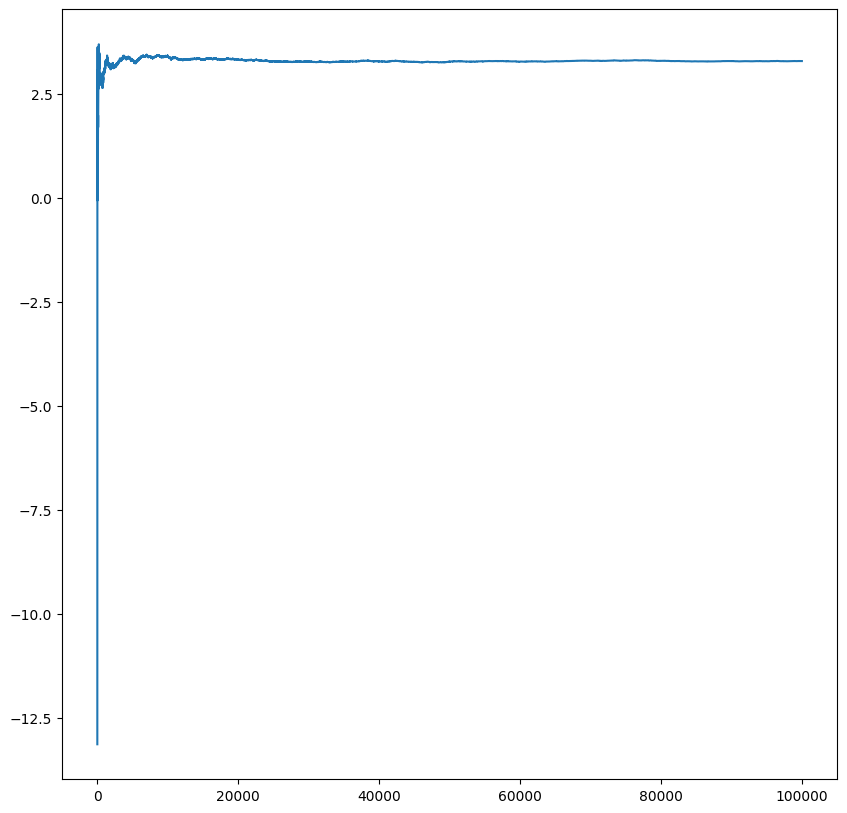

In [114]:
E_maxQ = 0.
track = []
fig = plt.figure(figsize=(10,10))
for i in range(NUM_SAMPLES):
    Qhat1 = sample()
    Qhat2 = sample()
    argmax = np.argmax(Qhat1)
    E_maxQ = E_maxQ + (Qhat2[argmax] - E_maxQ)/ (i+1)
    track.append(E_maxQ)
plt.plot(track)
print(E_maxQ)